# Movie Studio Recommendations

## Analyzing the Data 

### Measure of Success
We aim to establish a measure of success that the new studio can strive to achieve, which will also help shape our recommendations. Since the studio's goal is to maximize revenue, we will define success as the annual gross revenue of the 5th highest-performing competitor studio.

In [372]:
# Imports
import sqlite3
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [373]:
# Grabbing the merged_data df from data_cleaning_notebook.ipynb
merged_data = pd.read_pickle("merged_data.pkl")
merged_data

,movie_id,primary_title,genres,individual_genre,runtime_minutes,title,studio,domestic_gross,foreign_gross,year,averagerating,numvotes,director_id,director_name,total_gross
0,tt0315642,Wazir,"Action,Crime,Drama",Action,103.0,Wazir,Relbig.,1100000.0,0.0,2016,7.1,15378,nm2349060,Bejoy Nambiar,1100000.0
1,tt0315642,Wazir,"Action,Crime,Drama",Crime,103.0,Wazir,Relbig.,1100000.0,0.0,2016,7.1,15378,nm2349060,Bejoy Nambiar,1100000.0
2,tt0315642,Wazir,"Action,Crime,Drama",Drama,103.0,Wazir,Relbig.,1100000.0,0.0,2016,7.1,15378,nm2349060,Bejoy Nambiar,1100000.0
3,tt0337692,On the Road,"Adventure,Drama,Romance",Adventure,124.0,On the Road,IFC,744000.0,8000000.0,2012,6.1,37886,nm0758574,Walter Salles,8744000.0
4,tt0337692,On the Road,"Adventure,Drama,Romance",Drama,124.0,On the Road,IFC,744000.0,8000000.0,2012,6.1,37886,nm0758574,Walter Salles,8744000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7764,tt8427036,Helicopter Eela,Drama,Drama,135.0,Helicopter Eela,Eros,72000.0,0.0,2018,5.4,673,nm1224879,Pradeep Sarkar,72000.0
7765,tt9078374,Last Letter,"Drama,Romance",Drama,114.0,Last Letter,CL,181000.0,0.0,2018,6.4,322,nm0412517,Shunji Iwai,181000.0
7766,tt9078374,Last Letter,"Drama,Romance",Romance,114.0,Last Letter,CL,181000.0,0.0,2018,6.4,322,nm0412517,Shunji Iwai,181000.0
7767,tt9151704,Burn the Stage: The Movie,"Documentary,Music",Documentary,84.0,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000.0,2018,8.8,2067,nm10201503,Jun-Soo Park,20300000.0


In [374]:
# 2018 is the latest year in our data
merged_data["year"].value_counts()

year
2016    1062
2015    1020
2011     959
2012     925
2014     889
2017     804
2013     764
2018     722
2010     624
Name: count, dtype: int64

In [375]:
# Use 2018 data as it's the most recent
data_2018 = merged_data[merged_data["year"] == 2018]
data_2018


,movie_id,primary_title,genres,individual_genre,runtime_minutes,title,studio,domestic_gross,foreign_gross,year,averagerating,numvotes,director_id,director_name,total_gross
240,tt0800054,The Guardians,"Comedy,Family",Comedy,88.0,The Guardians,MBox,177000.0,0.0,2018,7.8,68,nm0401827,Chris Hummel,177000.0
241,tt0800054,The Guardians,"Comedy,Family",Family,88.0,The Guardians,MBox,177000.0,0.0,2018,7.8,68,nm0401827,Chris Hummel,177000.0
242,tt6213362,The Guardians,"Drama,War",Drama,138.0,The Guardians,MBox,177000.0,0.0,2018,6.8,1314,nm0064741,Xavier Beauvois,177000.0
243,tt6213362,The Guardians,"Drama,War",War,138.0,The Guardians,MBox,177000.0,0.0,2018,6.8,1314,nm0064741,Xavier Beauvois,177000.0
244,tt6901956,The Guardians,"Action,Adventure,Comedy",Action,46.0,The Guardians,MBox,177000.0,0.0,2018,4.1,7,nm7014443,Sebastian Garcia Lorenzo,177000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7764,tt8427036,Helicopter Eela,Drama,Drama,135.0,Helicopter Eela,Eros,72000.0,0.0,2018,5.4,673,nm1224879,Pradeep Sarkar,72000.0
7765,tt9078374,Last Letter,"Drama,Romance",Drama,114.0,Last Letter,CL,181000.0,0.0,2018,6.4,322,nm0412517,Shunji Iwai,181000.0
7766,tt9078374,Last Letter,"Drama,Romance",Romance,114.0,Last Letter,CL,181000.0,0.0,2018,6.4,322,nm0412517,Shunji Iwai,181000.0
7767,tt9151704,Burn the Stage: The Movie,"Documentary,Music",Documentary,84.0,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000.0,2018,8.8,2067,nm10201503,Jun-Soo Park,20300000.0


In [376]:
# since we have multiple rows for each movie_id (one row for each
# genre and director), we have to groupby movie_id

gross_by_movie_id_2018 = data_2018.groupby("movie_id")[["runtime_minutes", "studio", "total_gross"]].max()
gross_by_movie_id_2018

,runtime_minutes,studio,total_gross
movie_id,,,
tt0800054,88.0,MBox,177000.0
tt0804509,100.0,WB,172500000.0
tt1034415,152.0,Amazon,7900000.0
tt1072748,99.0,LGF,25100000.0
tt1213641,141.0,Uni.,105700000.0
...,...,...,...
tt8404272,101.0,WGUSA,82847000.0
tt8427036,135.0,Eros,72000.0
tt9042690,89.0,CJ,111000.0


In [377]:
gross_by_studio_2018 = gross_by_movie_id_2018.groupby("studio")["total_gross"].sum().sort_values(ascending=False)
gross_by_studio_2018

studio
BV       5.469700e+09
WB       5.073300e+09
Uni.     4.043222e+09
Par.     2.364300e+09
Fox      2.128500e+09
             ...     
OutF     7.350000e+04
Super    5.210000e+04
Icar.    1.780000e+04
Men.     1.220000e+04
Grav.    1.700000e+03
Name: total_gross, Length: 67, dtype: float64

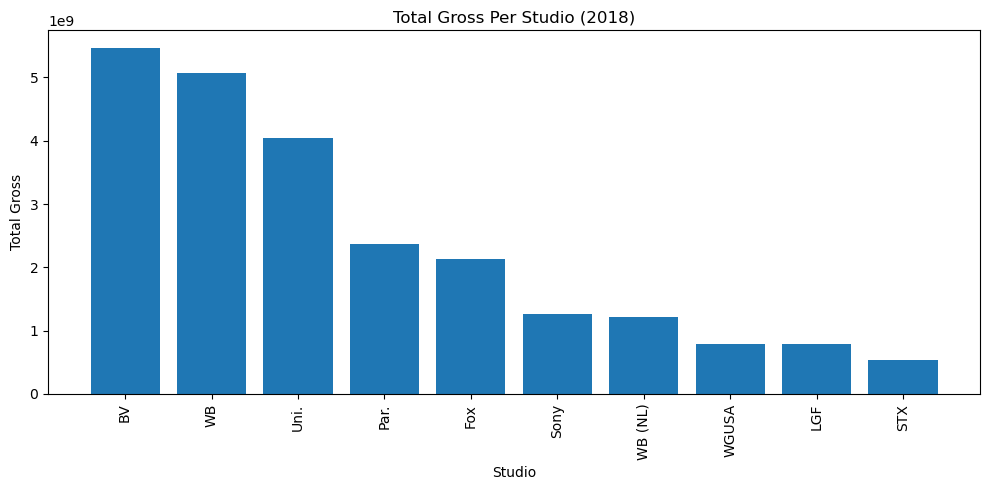

In [378]:
# Plot the top 10 grossing studios

fig, ax = plt.subplots(figsize=(10,5))

top_10_studios_2018 = list(gross_by_studio_2018.keys())[:10]
top_10_gross_2018 = list(gross_by_studio_2018.values)[:10]

ax.bar(top_10_studios_2018, top_10_gross_2018)

ax.set_title("Total Gross Per Studio (2018)")
ax.set_xlabel("Studio")
ax.set_ylabel("Total Gross")
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

In [379]:
# "Box office success" can be defined as reaching the revenue
# of the middle studio among the top 10 in 2018.

box_office_success_goal = top_10_gross_2018[4]

print(f"The middle-grossing studio among the top 10: {top_10_studios_2018[4]} with a total annual gross profit of ${box_office_success_goal:,}")


The middle-grossing studio among the top 10: Fox with a total annual gross profit of $2,128,500,000.0


The fifth-most-successful studio is Fox with a total annual gross profit of $2,128,500,000. We recommend that the new studio generates a minimum annual revenue of $2,128,500,000.

### Genres in the Box Office
Which genres should the new studio focus on in order to meet this minimum annual revenue?

We will use an ANOVA test to see whether some genres perform significantly better in the box office than others using 2018 data.

**Null Hypothesis:** All genres on average perform the same in the box office in 2018

**Alternative Hypothesis:** Genres on average perform significantly differently in the box office in 2018

In [380]:
# check to see if there are any null values in total_gross
data_2018["total_gross"].isnull().sum()

0

In [381]:
# Getting median total gross reveue for each individual genre
gross_by_genre_2018 = data_2018.groupby("individual_genre")["total_gross"].sum().sort_values(ascending=False)
gross_by_genre_2018

individual_genre
Adventure      1.606630e+10
Action         1.440009e+10
Comedy         9.288034e+09
Drama          6.961431e+09
Sci-Fi         6.558036e+09
Thriller       4.002375e+09
Animation      3.890969e+09
Fantasy        3.672559e+09
Horror         2.396202e+09
Biography      2.072138e+09
Family         1.973797e+09
Romance        1.899027e+09
Crime          1.751435e+09
Mystery        1.589606e+09
Music          9.370327e+08
Documentary    6.968814e+08
History        4.765831e+08
Musical        3.950000e+08
Sport          3.025210e+08
War            2.315100e+07
Western        2.400000e+06
Name: total_gross, dtype: float64

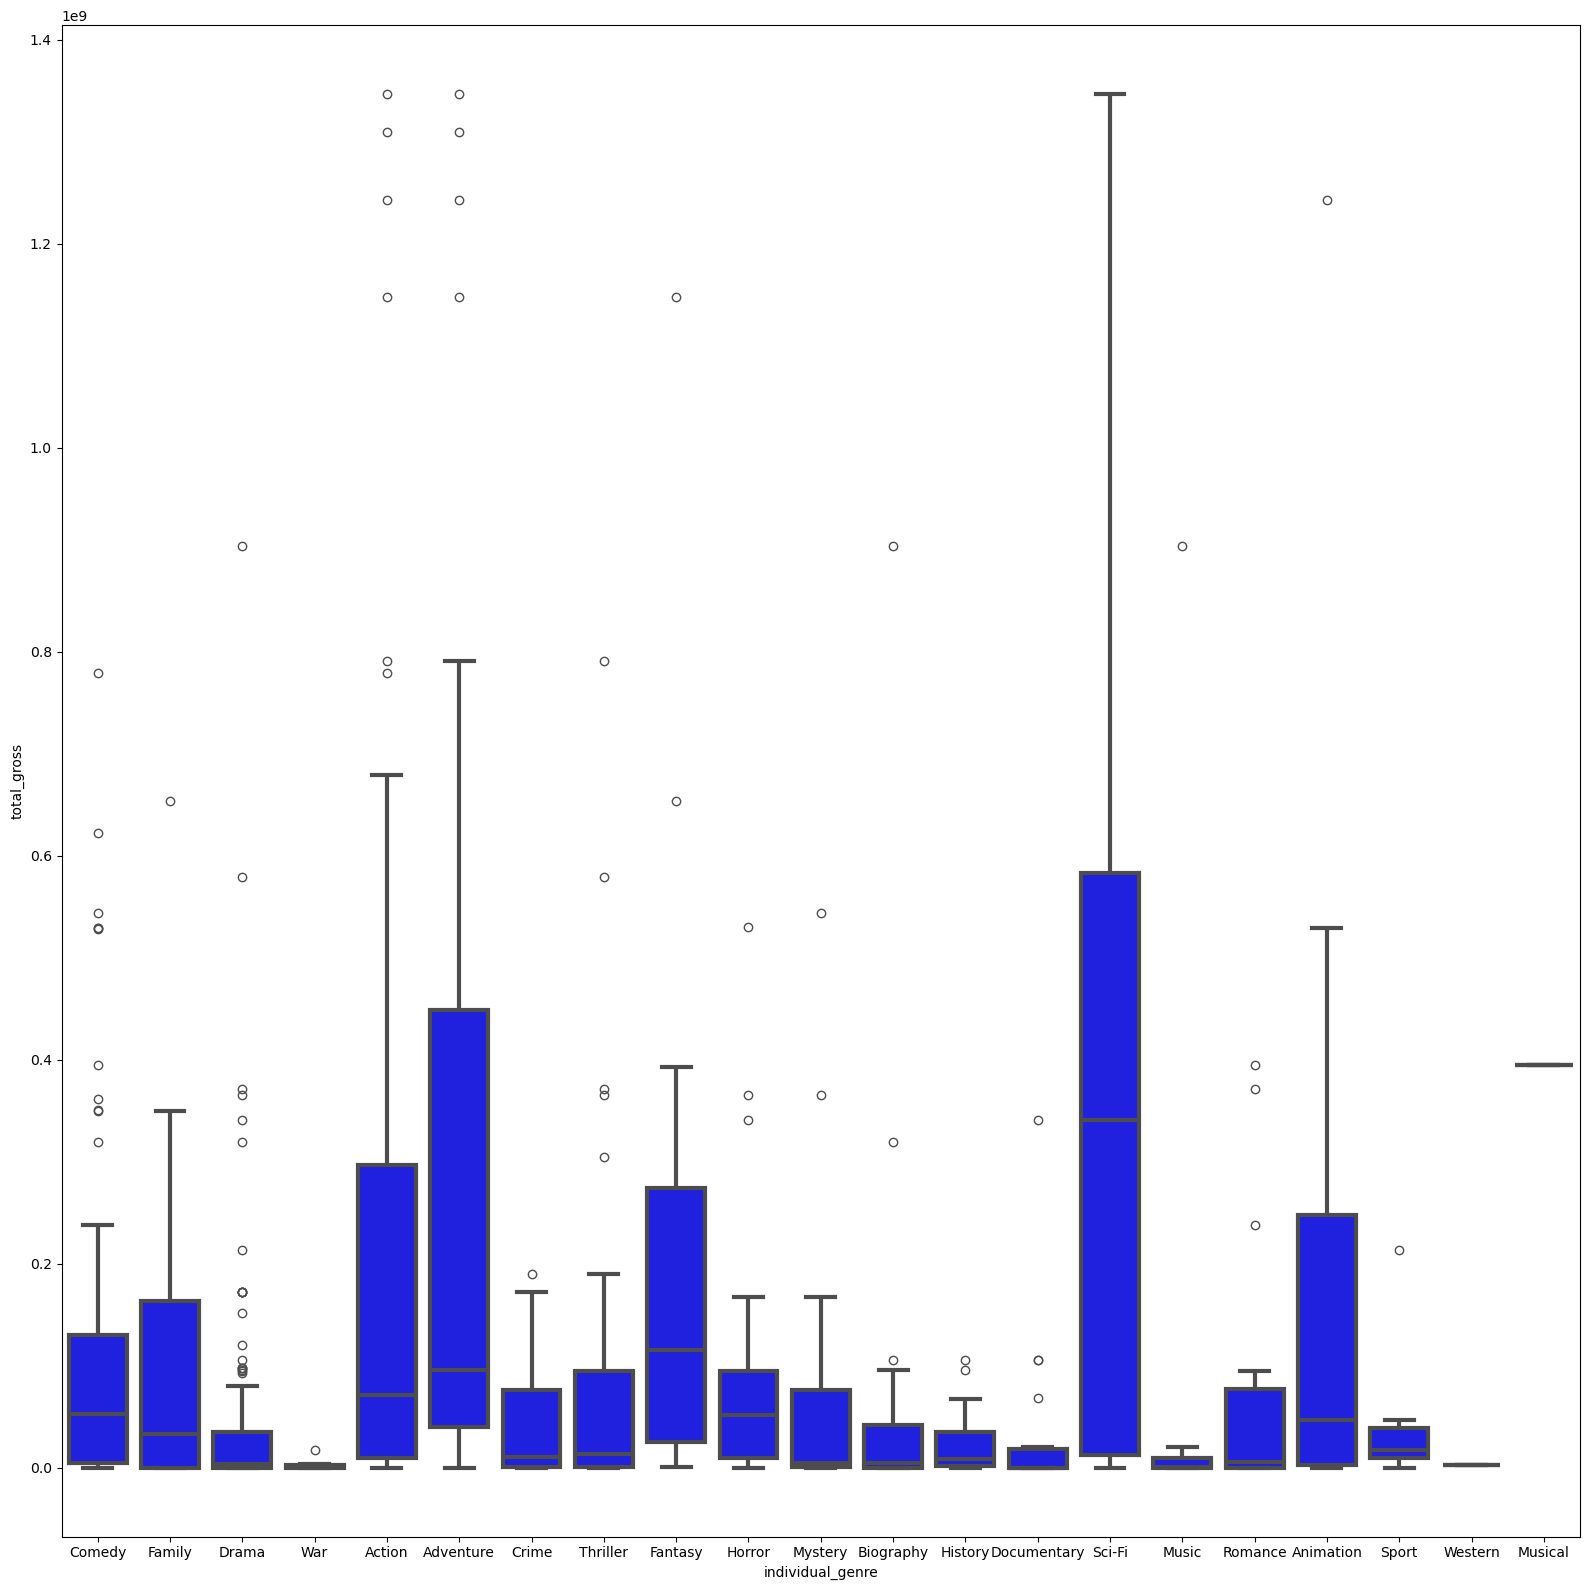

In [382]:
fig, ax = plt.subplots(figsize=(16, 16))

sns.boxplot(
    x="individual_genre",
    y="total_gross",
    data=data_2018,
    ax=ax,
    color="blue",
    linewidth=3
)

plt.tight_layout()

In [383]:
# define our alpha
alpha = 0.01

# get the list of genres in data
genres = list(data_2018["individual_genre"].unique())

# create dictionary of df for each genre
total_gross_data_per_genre_2018 = {}
for genre in genres:
    total_gross_data_per_genre_2018[genre] = list(data_2018[data_2018["individual_genre"] == genre]["total_gross"].values)

In [384]:
result = stats.f_oneway(*total_gross_data_per_genre_2018.values())
f_stat, p_value = result

p_value

4.0583942791545226e-18

In [385]:
p_value < alpha

True

Our p-value is less than our alpha, which means we can reject the null hypothesis. Genres on average perform significantly differently in the box office in 2018.

We know that there is a difference in box office success between genres, but we can look at the ANOVA table to know which genres are significantly different. 

In [386]:
# Look at the OLS ANOVA table
formula = "total_gross ~ C(individual_genre)"
anova_sm = ols(formula=formula, data=data_2018).fit()
anova_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_gross   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     7.039
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           4.06e-18
Time:                        15:33:41   Log-Likelihood:                -14836.
No. Observations:                 722   AIC:                         2.971e+04
Df Residuals:                     701   BIC:                         2.981e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           2.323e+08   2.62e+07      8.874      0.000    1.81e+08    2.84e+08
C(individual_genre)[T.Adventure]    4.475e+07   3.76e+07      1.189      0.235   -2.92e+07    1.19e+08
C(individual_genre)[T.Animation]   -3.771e+07    5.3e+07     -0.712      0.477   -1.42e+08    6.63e+07
C(individual_genre)[T.Biography]   -1.841e+08   4.09e+07     -4.501      0.000   -2.64e+08   -1.04e+08
C(individual_genre)[T.Comedy]      -1.162e+08   3.49e+07     -3.331      0.001   -1.85e+08   -4.77e+07
C(individual_genre)[T.Crime]       -1.925e+08   4.06e+07     -4.738      0.000   -2.72e+08   -1.13e+08
C(individual_genre)[T.Documentary] -1.974e+08    5.3e+07     -3.725      0.000   -3.01e+08   -9.34e+07
C(individual_genre)[T.Drama]       -1.911e+08   3.06e+07     -6.244      0.000   -2.51e+08   -1.31e+08
C(individual_genre)[T.Family]      -1.226e+08   5.52e+07     -2.222      0.027   -2.31e+08   -1.43e+07
C(individual_genre)[T.Fantasy]     -1.623e+07   5.64e+07     -0.288      0.774   -1.27e+08    9.45e+07
C(individual_genre)[T.History]     -2.072e+08    5.4e+07     -3.834      0.000   -3.13e+08   -1.01e+08
C(individual_genre)[T.Horror]      -1.435e+08   4.75e+07     -3.020      0.003   -2.37e+08   -5.02e+07
C(individual_genre)[T.Music]       -1.281e+08   7.35e+07     -1.743      0.082   -2.72e+08    1.62e+07
C(individual_genre)[T.Musical]      1.627e+08   2.08e+08      0.783      0.434   -2.45e+08    5.71e+08
C(individual_genre)[T.Mystery]      -1.66e+08   4.95e+07     -3.351      0.001   -2.63e+08   -6.88e+07
C(individual_genre)[T.Romance]      -1.78e+08   4.36e+07     -4.085      0.000   -2.64e+08   -9.25e+07
C(individual_genre)[T.Sci-Fi]       1.535e+08   5.64e+07      2.721      0.007    4.27e+07    2.64e+08
C(individual_genre)[T.Sport]       -1.818e+08   8.81e+07     -2.064      0.039   -3.55e+08   -8.85e+06
C(individual_genre)[T.Thriller]    -1.453e+08   4.01e+07     -3.622      0.000   -2.24e+08   -6.65e+07
C(individual_genre)[T.War]         -2.284e+08   8.81e+07     -2.592      0.010   -4.01e+08   -5.54e+07
C(individual_genre)[T.Western]     -2.299e+08   2.08e+08     -1.107      0.269   -6.38e+08    1.78e+08
==============================================================================
Omnibus:                      435.788   Durbin-Watson:                   0.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3728.479
Skew:                           2.664   Prob(JB):                         0.00
Kurtosis:                      12.775   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the table, we can see that coefficient for the `Adventure` genre had the largest positive effect on the total gross revenue. This means that Adventure movies earn $44,750,000 more than the baseline genre (intercept).

Alternatively, we can perform a Tukey's HSD Post-Hoc Test to find how genres and their median total gross revenue compare to one another.

In [387]:
tk_hsd = pairwise_tukeyhsd(data_2018["total_gross"], data_2018["individual_genre"], alpha=alpha)
tk_hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Action,Adventure,44745560.4561,0.9999,-107227952.1664,196719073.0785,False
Action,Animation,-37711111.6129,1.0,-251646782.6787,176224559.4529,False
Action,Biography,-184070305.1013,0.0015,-349172062.8951,-18968547.3075,True
Action,Comedy,-116159132.8629,0.1074,-256922761.6308,24604495.905,False
Action,Crime,-192454208.4311,0.0005,-356444398.696,-28464018.1662,True
Action,Documentary,-197415481.6129,0.0311,-411351152.6787,16520189.4529,False
Action,Drama,-191067649.8378,0.0,-314592379.7566,-67542919.9189,True
Action,Family,-122604146.0573,0.8067,-345345069.7408,100136777.6261,False
Action,Fantasy,-16226657.4953,1.0,-243988181.6056,211534866.6151,False
Action,History,-207176230.5603,0.0213,-425327118.1411,10974657.0206,False


We can see from the Tukey's HSD Post-Hoc test that some genres perform significantly differently in the box office. For example, the adjusted p-value between Action vs Biography is `0.0015`, which is smaller than our alpha and suggests that their gross revenue is significantly different. However, Action vs Adventure have have a large adjusted p-value of `0.9999`, suggesting their box office performance is not significantly different.

In [388]:
# Find top performing genre
top_genre_2018 = list(gross_by_genre_2018.keys())[0]
top_genre_gross_2018 = list(gross_by_genre_2018.values)[0]

top_genre_2018, top_genre_gross_2018

('Adventure', 16066296500.0)

In [389]:
# Find all the genres that reach the total gross profit goal
top_genres_2018 = [genre for genre in gross_by_genre_2018.keys() if gross_by_genre_2018[genre] >= box_office_success_goal]
top_genres_2018

['Adventure',
 'Action',
 'Comedy',
 'Drama',
 'Sci-Fi',
 'Thriller',
 'Animation',
 'Fantasy',
 'Horror']

The top-performing genre of 2018 was Adventure with total gross profit of $16,066,296,500, surpassing our annual gross revenue of of $2,128,500,000. However, there are other genres that also surpass our goal: Action, Comedy, Drama, Sci-Fi, Thriller, Animation, Fantasy, and Horror.

### Runtime vs Total Gross Profit

Now that we know Sci-Fi is the top-performing genre, let's take a look at the average runtime of all the top performing genres of 2018. We can also do an ANOVA test to see whether there is an average runtime that generates the most revenue in 2018.

**Null Hypothesis:** All runtimes on average perform the same in the box office in 2018

**Alternative Hypothesis:** Runtimes on average perform significantly differently in the box office than others in 2018

In [390]:
# clean runtime data -- since there's only 1 row with a null runtime
# we can drop it
runtime_2018 = data_2018.dropna(subset=["runtime_minutes"])
runtime_2018["runtime_minutes"].value_counts()

runtime_minutes
100.0    38
96.0     30
103.0    27
110.0    25
107.0    22
         ..
65.0      1
156.0     1
74.0      1
72.0      1
136.0     1
Name: count, Length: 77, dtype: int64

In [391]:
# Find average runtimes of each top performing genre of 2018
top_genre_runtime_2018 = runtime_2018[runtime_2018["individual_genre"].isin(top_genres_2018)].groupby("individual_genre")["runtime_minutes"].median().sort_values(ascending=False)
top_genre_runtime_2018

individual_genre
Fantasy      116.0
Action       114.0
Sci-Fi       110.0
Drama        107.0
Thriller     106.0
Adventure    103.5
Comedy       103.0
Horror        98.0
Animation     96.5
Name: runtime_minutes, dtype: float64

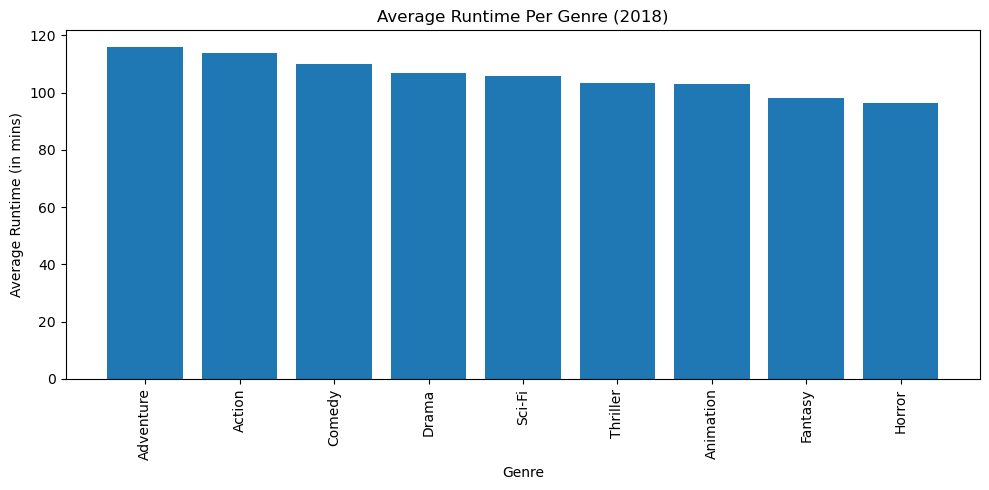

In [392]:
# graph the average runtimes for each genre

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(top_genres_2018, top_genre_runtime_2018.values)

ax.set_title("Average Runtime Per Genre (2018)")
ax.set_xlabel("Genre")
ax.set_ylabel("Average Runtime (in mins)")
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

In [393]:
# Get the runtime data for only the top genres found above

top_genre_runtime_2018_data = runtime_2018[runtime_2018["individual_genre"].isin(top_genres_2018)]
top_genre_runtime_2018_data

,movie_id,primary_title,genres,individual_genre,runtime_minutes,title,studio,domestic_gross,foreign_gross,year,averagerating,numvotes,director_id,director_name,total_gross
240,tt0800054,The Guardians,"Comedy,Family",Comedy,88.0,The Guardians,MBox,177000.0,0.0,2018,7.8,68,nm0401827,Chris Hummel,177000.0
242,tt6213362,The Guardians,"Drama,War",Drama,138.0,The Guardians,MBox,177000.0,0.0,2018,6.8,1314,nm0064741,Xavier Beauvois,177000.0
244,tt6901956,The Guardians,"Action,Adventure,Comedy",Action,46.0,The Guardians,MBox,177000.0,0.0,2018,4.1,7,nm7014443,Sebastian Garcia Lorenzo,177000.0
245,tt6901956,The Guardians,"Action,Adventure,Comedy",Adventure,46.0,The Guardians,MBox,177000.0,0.0,2018,4.1,7,nm7014443,Sebastian Garcia Lorenzo,177000.0
246,tt6901956,The Guardians,"Action,Adventure,Comedy",Comedy,46.0,The Guardians,MBox,177000.0,0.0,2018,4.1,7,nm7014443,Sebastian Garcia Lorenzo,177000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7758,tt8119752,Gonjiam: Haunted Asylum,"Horror,Mystery",Horror,95.0,Gonjiam: Haunted Asylum,WGUSA,115000.0,0.0,2018,6.1,2585,nm2891286,Beom-sik Jeong,115000.0
7760,tt8267604,Capernaum,Drama,Drama,126.0,Capernaum,SPC,1700000.0,0.0,2018,8.5,20215,nm1701024,Nadine Labaki,1700000.0
7761,tt8290698,The Spy Gone North,Drama,Drama,137.0,The Spy Gone North,CJ,501000.0,0.0,2018,7.2,1620,nm2151556,Jong-bin Yoon,501000.0
7764,tt8427036,Helicopter Eela,Drama,Drama,135.0,Helicopter Eela,Eros,72000.0,0.0,2018,5.4,673,nm1224879,Pradeep Sarkar,72000.0


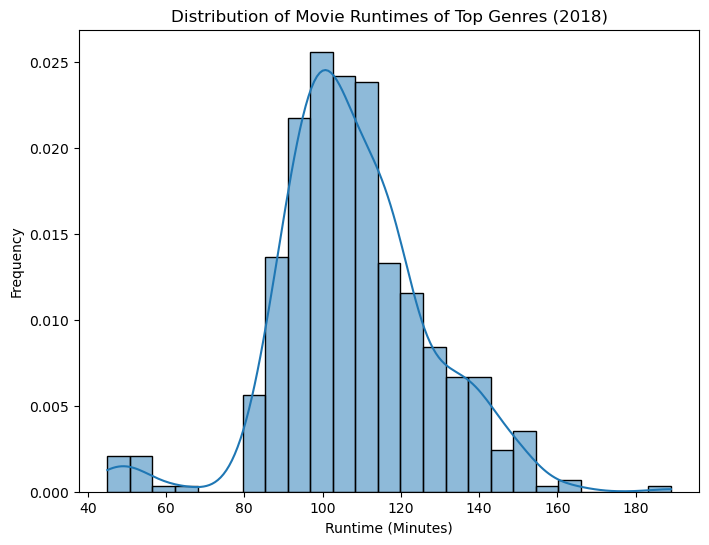

In [394]:
# Let's plot the runtimes of the top genres
plt.figure(figsize=(8,6))

sns.histplot(top_genre_runtime_2018_data["runtime_minutes"], stat="density", kde=True)
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Runtimes of Top Genres (2018)")
plt.show()

In [395]:
quartile_vals = top_genre_runtime_2018_data["runtime_minutes"].quantile([0.25, 0.75])
first_quartile, third_quartile = quartile_vals.values[0], quartile_vals.values[1]

runtime_bins = ["first", "iqr", "fourth"]

first_quartile, third_quartile

(96.0, 119.0)

In [396]:
def mapper(runtime):
    """
    Takes the runtime and returns the quartile bin
    """
    if runtime < first_quartile:
        return runtime_bins[0]
    elif runtime >= first_quartile and runtime <= third_quartile:
        return runtime_bins[1]
    else:
        return runtime_bins[2]

In [397]:
# bin runtimes into quartiles

top_genre_runtime_2018_data["runtime_quartile"] = top_genre_runtime_2018_data["runtime_minutes"].map(mapper)
top_genre_runtime_2018_data

/var/folders/8g/m6zcqnnd1p36dhf35mwkv0zw0000gn/T/ipykernel_67633/1239617411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_genre_runtime_2018_data["runtime_quartile"] = top_genre_runtime_2018_data["runtime_minutes"].map(mapper)


,movie_id,primary_title,genres,individual_genre,runtime_minutes,title,studio,domestic_gross,foreign_gross,year,averagerating,numvotes,director_id,director_name,total_gross,runtime_quartile
240,tt0800054,The Guardians,"Comedy,Family",Comedy,88.0,The Guardians,MBox,177000.0,0.0,2018,7.8,68,nm0401827,Chris Hummel,177000.0,first
242,tt6213362,The Guardians,"Drama,War",Drama,138.0,The Guardians,MBox,177000.0,0.0,2018,6.8,1314,nm0064741,Xavier Beauvois,177000.0,fourth
244,tt6901956,The Guardians,"Action,Adventure,Comedy",Action,46.0,The Guardians,MBox,177000.0,0.0,2018,4.1,7,nm7014443,Sebastian Garcia Lorenzo,177000.0,first
245,tt6901956,The Guardians,"Action,Adventure,Comedy",Adventure,46.0,The Guardians,MBox,177000.0,0.0,2018,4.1,7,nm7014443,Sebastian Garcia Lorenzo,177000.0,first
246,tt6901956,The Guardians,"Action,Adventure,Comedy",Comedy,46.0,The Guardians,MBox,177000.0,0.0,2018,4.1,7,nm7014443,Sebastian Garcia Lorenzo,177000.0,first
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7758,tt8119752,Gonjiam: Haunted Asylum,"Horror,Mystery",Horror,95.0,Gonjiam: Haunted Asylum,WGUSA,115000.0,0.0,2018,6.1,2585,nm2891286,Beom-sik Jeong,115000.0,first
7760,tt8267604,Capernaum,Drama,Drama,126.0,Capernaum,SPC,1700000.0,0.0,2018,8.5,20215,nm1701024,Nadine Labaki,1700000.0,fourth
7761,tt8290698,The Spy Gone North,Drama,Drama,137.0,The Spy Gone North,CJ,501000.0,0.0,2018,7.2,1620,nm2151556,Jong-bin Yoon,501000.0,fourth
7764,tt8427036,Helicopter Eela,Drama,Drama,135.0,Helicopter Eela,Eros,72000.0,0.0,2018,5.4,673,nm1224879,Pradeep Sarkar,72000.0,fourth


In [398]:
# ANOVA test of runtime bins vs total gross

total_gross_data_per_runtimebin_2018 = {}
for runtime_bin in runtime_bins:
    total_gross_data_per_runtimebin_2018[runtime_bin] = list(top_genre_runtime_2018_data[top_genre_runtime_2018_data["runtime_quartile"] == runtime_bin]["total_gross"].values)

In [399]:
result = stats.f_oneway(*total_gross_data_per_runtimebin_2018.values())
f_stat, p_value = result

p_value

3.637082102930805e-10

In [400]:
p_value < alpha

True

Our p-value is less than our alpha, so we can reject the null hypothesis. Runtimes on average perform significantly differently in the box office than others in 2018.

Let's look at the ANOVA table to see which runtime bins are significantly different.

In [401]:
# Look at the OLS ANOVA table
formula = "total_gross ~ C(runtime_quartile)"
anova_sm = ols(formula=formula, data=top_genre_runtime_2018_data).fit()
anova_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_gross   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     22.72
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           3.64e-10
Time:                        15:33:46   Log-Likelihood:                -10256.
No. Observations:                 495   AIC:                         2.052e+04
Df Residuals:                     492   BIC:                         2.053e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       5.42e+07   2.32e+07      2.332      0.020    8.54e+06    9.99e+07
C(runtime_quartile)[T.fourth]  2.066e+08   3.23e+07      6.397      0.000    1.43e+08     2.7e+08
C(runtime_quartile)[T.iqr]     6.062e+07   2.75e+07      2.206      0.028    6.62e+06    1.15e+08
==============================================================================
Omnibus:                      267.321   Durbin-Watson:                   0.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1513.044
Skew:                           2.404   Prob(JB):                         0.00
Kurtosis:                      10.089   Cond. No.                         4.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [402]:
tk_hsd = pairwise_tukeyhsd(top_genre_runtime_2018_data["total_gross"], top_genre_runtime_2018_data["runtime_quartile"], alpha=alpha)
tk_hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
first,fourth,206589455.9706,0.0,112067532.4881,301111379.4532,True
first,iqr,60620000.5501,0.0712,-19820079.8047,141060080.9049,False
fourth,iqr,-145969455.4205,0.0,-224401088.2405,-67537822.6005,True


## Insights
- I've been using 2018 data because it's the most recent data, and we should focus on annual gross profit
- The goal of total annual gross profit: $2,128,500,000
- The top-performing genre of 2018 was Adventure with total gross profit of $16,066,296,500, reaching our goal of $2,128,500,000. However, there are other genres that can also surpass our goal: ['Adventure', 'Action', 'Comedy', 'Drama', 'Sci-Fi', 'Thriller', 'Animation', 'Fantasy', 'Horror']


- baseline -- defining success (anbita)
- top genres -- which genres will get us to our baseline? Post-hoc (is there sig difference in top genres?) (anbita)
- franchise (plays into the director loyalty, court a director / an IP) (jayla)
- director vs studio loyalty (consistency of director for the franchise, sticking with this individual for the whole thing) (director vs all other directors (t-test)) (jayla)